# Source

> http://archive.ics.uci.edu/ml/datasets/Energy+efficiency#



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV



In [3]:
import pandas_profiling
!pip install --upgrade pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
data = pd.read_excel('/content/drive/MyDrive/DataSets/EnergyEfficiencyPrediction/ENB2012_data.xlsx')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [6]:
data.shape

(768, 10)

In [7]:
data.head()

X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28

In [8]:
data.describe()

X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
25%      0.682500  606.375000  294.000000  140.875000    3.50000    2.750000   
50%      0.750000  673.750000  318.500000  183.750000    5.25000    3.500000   
75%      0.830000  741.125000  343.000000  220.500000    7.00000    4.250000   
max      0.980000  808.500000  416.500000  220.500000    7.00000    5.000000   

               X7         X8          Y1          Y2  
count  768.000000  768.00000  768.000000  768.000000  
mean     0.234375    2.81250   22.307195   24.587760  
std      0.133221    1.55096   10.090204    9.513306  
min      0.000000    0.00000    6.010000   10.900000  
25%      0.100000    1.75000   12.992500   15.620000  
50%      0.250000    3.00000   18.950000   22.080000  
75%      0.400000    4.00000   31.667500   33.132500  
max      0.400000    5.00000   43.100000   48.030000

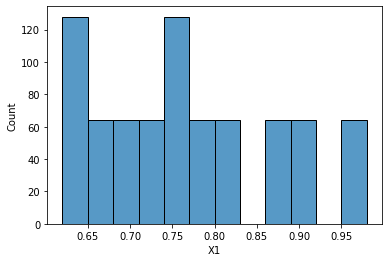

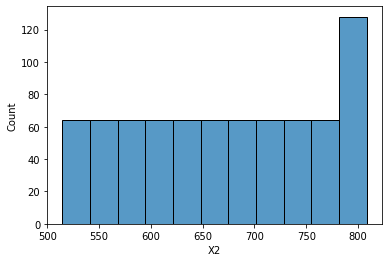

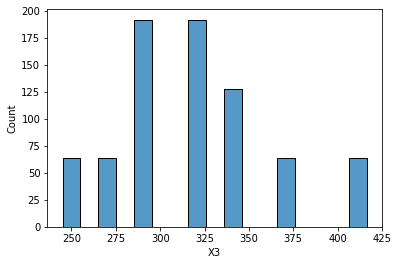

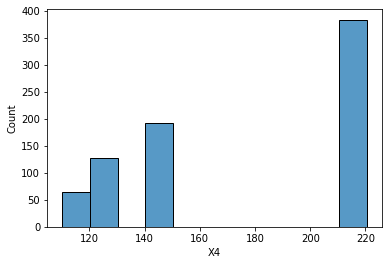

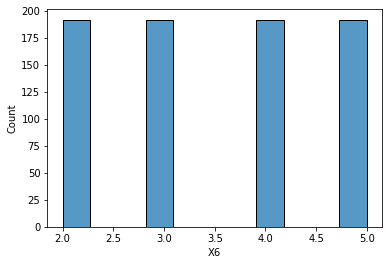

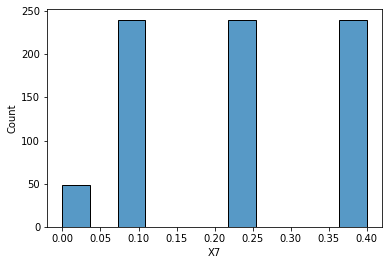

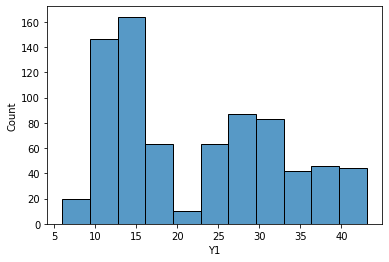

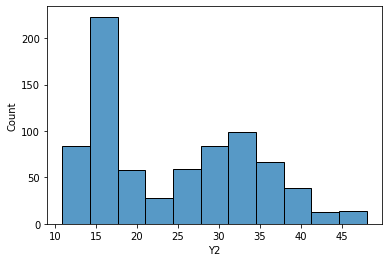

In [10]:
for column in data.columns:
  sns.histplot(data=data, x = column)
  plt.show()

In [11]:
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0:8], data.iloc[:,8:10], test_size=0.25, random_state=43)

# Standardization

In [41]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Correlation

In [61]:
plt.figure(figsize=(12,9))

sns.heatmap(round(data.corr(),3), annot = True, vmin=-1, vmax=1, cmap="YlGnBu", linewidths=.6)

plt.show()

# PCA

In [51]:
pca = PCA(n_components=X_train_std.shape[1])
pca_data = pca.fit_transform(X_train_std)

percent_var_explained = pca.explained_variance_/np.sum(pca.explained_variance_)
cumsum_var_explained = np.cumsum(percent_var_explained)


In [52]:
plt.plot(cumsum_var_explained)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('% variance explained')
plt.show()

In [53]:
cumsum_var_explained

array([0.46287525, 0.62067228, 0.77377347, 0.89845737, 0.99268243,
       0.999464  , 1.        , 1.        ])

In [57]:
sum(pca.explained_variance_ratio_)

0.9999999999999999

In [58]:
pca = PCA(n_components=5)
X_train_std_pca = pca.fit_transform(X_train_std)
X_test_std_pca = pca.transform(X_test_std)

# Correlation after PCA

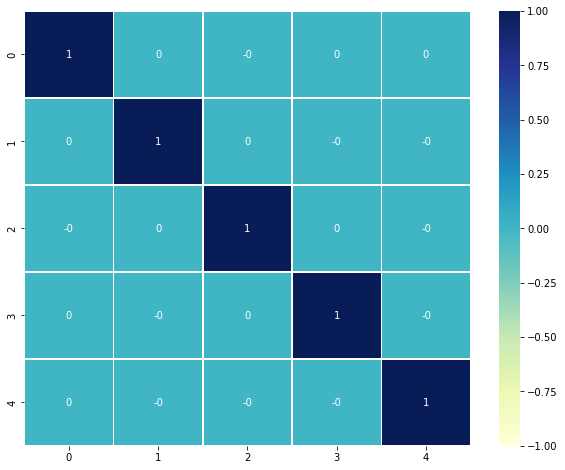

In [64]:
plt.figure(figsize=(10,8))
sns.heatmap(data=round(pd.DataFrame(X_train_std_pca).corr(),3), annot = True, vmin=-1, vmax=1, cmap="YlGnBu", linewidths=.6)

plt.show()

 

> Поиск оптимальной модели с помощью GridSearchCV



In [65]:
empty_models = [
          Ridge(),
          Lasso(),
          SVR(),
          ElasticNet(),
          RandomForestRegressor(),
          DecisionTreeRegressor(),
          KNeighborsRegressor()]


In [66]:
params = [
         {
           # Ridge
          'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]
         },
          
         {
           # Lasso
          'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]
              
         },

         { # SVR
          'C' : [0.1, 1], 
          'gamma' : ['auto', 'scale'],
          'kernel': ['linear']
         },

         { # ElasticNet
          'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
          'normalize': [True, False],
          'selection': ['cyclic', 'random']
         },

         {
           # RandomForestRegressor
          'n_estimators' : [50, 100],
          'max_features' : ['sqrt']
         },
          
         {
           # DecisionTreeRegressor
          'criterion' : [ 'gini','entropy', 'mse'],
          'max_depth' : [2,4,6,8,10,12]
         },
          
         {
            # KNeighborsRegressor
           'n_neighbors': [4,5,6,7,8,9,10]
         }
         ]
          

In [67]:
results = pd.DataFrame()
temp_results = {}

In [68]:

y_train_col_indexes = range(y_train.shape[1])

for i in range(len(empty_models)):

    model_name = str(empty_models[i])
    temp_results['Algorithm'] = model_name[: model_name.index('(')]

    gscv = GridSearchCV(empty_models[i], param_grid=params[i], n_jobs=-1, cv = 5, scoring='r2')

    for j in y_train_col_indexes :

        gscv.fit(X_train_std_pca, y_train.iloc[:, j])

        temp_results[f'Best_params_for_pred_y{j}'] = gscv.best_params_
        temp_results[f'Best_r2_score_for_pred_y{j}'] = r2_score(y_test.iloc[:, j], gscv.best_estimator_.predict(X_test_std_pca))

    results = results.append(temp_results, ignore_index=True)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 90.
The score on these train-test par

In [69]:
results

Algorithm                            Best_params_for_pred_y0  \
0                  Ridge                                       {'alpha': 5}   
1                  Lasso                                   {'alpha': 0.001}   
2                    SVR      {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}   
3             ElasticNet  {'alpha': 0.01, 'normalize': False, 'selection...   
4  RandomForestRegressor      {'max_features': 'sqrt', 'n_estimators': 100}   
5  DecisionTreeRegressor              {'criterion': 'mse', 'max_depth': 10}   
6    KNeighborsRegressor                                 {'n_neighbors': 7}   

   Best_r2_score_for_pred_y0  \
0                   0.905680   
1                   0.905684   
2                   0.905412   
3                   0.905678   
4                   0.990519   
5                   0.989809   
6                   0.955067   

                             Best_params_for_pred_y1  \
0                                       {'alpha': 5}   
1                                   {'alpha': 1e-15}   
2      {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}   
3  {'alpha': 0.01, 'normalize': False, 'selection...   
4      {'max_features': 'sqrt', 'n_estimators': 100}   
5               {'criterion': 'mse', 'max_depth': 8}   
6                                 {'n_neighbors': 8}   

   Best_r2_score_for_pred_y1  
0                   0.867155  
1                   0.867160  
2                   0.864158  
3                   0.867127  
4                   0.954655  
5                   0.946581  
6                   0.928293



> LinearRegression


In [70]:
lr = LinearRegression()

temp_results['Algorithm'] = 'LinearRegression'

for i in range(y_train.shape[1]):

    lr.fit(X_train_std_pca, y_train.iloc[:, i])

    temp_results[f'Best_params_for_pred_y{i}'] = np.nan
    temp_results[f'Best_r2_score_for_pred_y{i}'] = r2_score(y_test.iloc[:, i], lr.predict(X_test_std_pca))


results = results.append(temp_results, ignore_index=True)


In [71]:
results

Algorithm                            Best_params_for_pred_y0  \
0                  Ridge                                       {'alpha': 5}   
1                  Lasso                                   {'alpha': 0.001}   
2                    SVR      {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}   
3             ElasticNet  {'alpha': 0.01, 'normalize': False, 'selection...   
4  RandomForestRegressor      {'max_features': 'sqrt', 'n_estimators': 100}   
5  DecisionTreeRegressor              {'criterion': 'mse', 'max_depth': 10}   
6    KNeighborsRegressor                                 {'n_neighbors': 7}   
7       LinearRegression                                                NaN   

   Best_r2_score_for_pred_y0  \
0                   0.905680   
1                   0.905684   
2                   0.905412   
3                   0.905678   
4                   0.990519   
5                   0.989809   
6                   0.955067   
7                   0.905685   

                             Best_params_for_pred_y1  \
0                                       {'alpha': 5}   
1                                   {'alpha': 1e-15}   
2      {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}   
3  {'alpha': 0.01, 'normalize': False, 'selection...   
4      {'max_features': 'sqrt', 'n_estimators': 100}   
5               {'criterion': 'mse', 'max_depth': 8}   
6                                 {'n_neighbors': 8}   
7                                                NaN   

   Best_r2_score_for_pred_y1  
0                   0.867155  
1                   0.867160  
2                   0.864158  
3                   0.867127  
4                   0.954655  
5                   0.946581  
6                   0.928293  
7                   0.867160



> Визуализация результатов




In [131]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
ax0 = sns.barplot(data = results, x='Algorithm', y='Best_r2_score_for_pred_y0', color='#1E90FF')
ax0.set_xticklabels(ax0.get_xticklabels(),rotation = 60)
ax0.set_title('R2_score_Y0')

plt.subplot(1,2,2)
ax1 = sns.barplot(data = results, x='Algorithm', y='Best_r2_score_for_pred_y1', color='#FF6347' )
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 60)
ax1.set_title('R2_score_Y1')

Text(0.5, 1.0, 'R2_score_Y1')